## 1. Define Paths and Configuration

In [1]:
import os
import pandas as pd
import sys

# Add project root to path to import config
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))
sys.path.append(PROJECT_ROOT)

from config.constants import PROCESSED_IMAGE_DATA_DIR, CLEANED_IMAGE_DATA_DIR
from utils.generate_image_csv import generate_image_csv
from utils.image_plot import plot_class_distribution, plot_sample_images
from utils.image_processing import get_image_generator


2025-12-13 15:29:51.868634: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-13 15:29:52.602664: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-13 15:30:01.534647: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


## 2. Merge Dataset Folders & Generate Master CSV

We will read the original `instruments.csv`, copy all files to a single flat directory, and create a new CSV.
To avoid filename collisions (e.g., `train/guitar/001.jpg` vs `test/guitar/001.jpg`), we will rename files to include their split and label.
Format: `{dataset}_{label}_{original_filename}`

In [2]:
# Run the generation script
generate_image_csv()

Raw Data Directory: /home/insane.beggar/Be-Serious/Learning/ENSET/S3/AI Advanced/Project/musical-instrument-classifier/data/images/raw
Clean Data Directory: /home/insane.beggar/Be-Serious/Learning/ENSET/S3/AI Advanced/Project/musical-instrument-classifier/data/images/processed/clean
Created directory: /home/insane.beggar/Be-Serious/Learning/ENSET/S3/AI Advanced/Project/musical-instrument-classifier/data/images/processed/clean
Total files in raw CSV: 5093
Merging files...


100%|██████████| 5093/5093 [00:03<00:00, 1447.60it/s]


Successfully processed 5093 images.
Saved master CSV to: /home/insane.beggar/Be-Serious/Learning/ENSET/S3/AI Advanced/Project/musical-instrument-classifier/data/images/processed/instruments.csv


## 3. Load and Inspect Data

In [3]:
PROCESSED_CSV_PATH = PROCESSED_IMAGE_DATA_DIR / "instruments.csv"
CLEAN_IMAGE_DIR = PROCESSED_IMAGE_DATA_DIR / "clean"

# Load the newly created CSV
df = pd.read_csv(PROCESSED_CSV_PATH)
print(df.head())
print(f"Shape: {df.shape}")

                 filename     label
0  train_acordian_001.jpg  acordian
1  train_acordian_002.jpg  acordian
2  train_acordian_003.jpg  acordian
3  train_acordian_004.jpg  acordian
4  train_acordian_005.jpg  acordian
Shape: (5093, 2)


## 4. Exploratory Data Analysis (EDA)
Check class distribution.

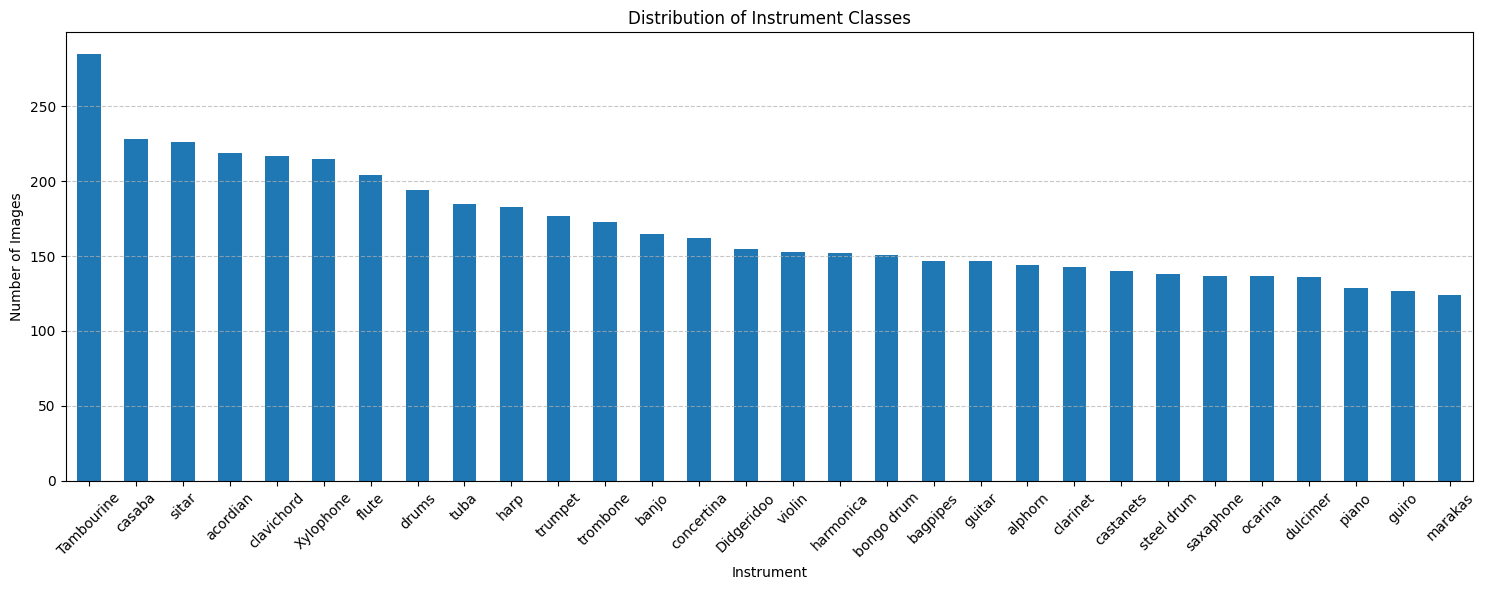


Class Counts:
label
Tambourine    285
casaba        228
sitar         226
acordian      219
clavichord    217
Xylophone     215
flute         204
drums         194
tuba          185
harp          183
trumpet       177
trombone      173
banjo         165
concertina    162
Didgeridoo    155
violin        153
harmonica     152
bongo drum    151
bagpipes      147
guitar        147
alphorn       144
clarinet      143
castanets     140
steel drum    138
saxaphone     137
ocarina       137
dulcimer      136
piano         129
guiro         127
marakas       124
Name: count, dtype: int64


In [4]:
plot_class_distribution(df)

## 5. Visualize Sample Images

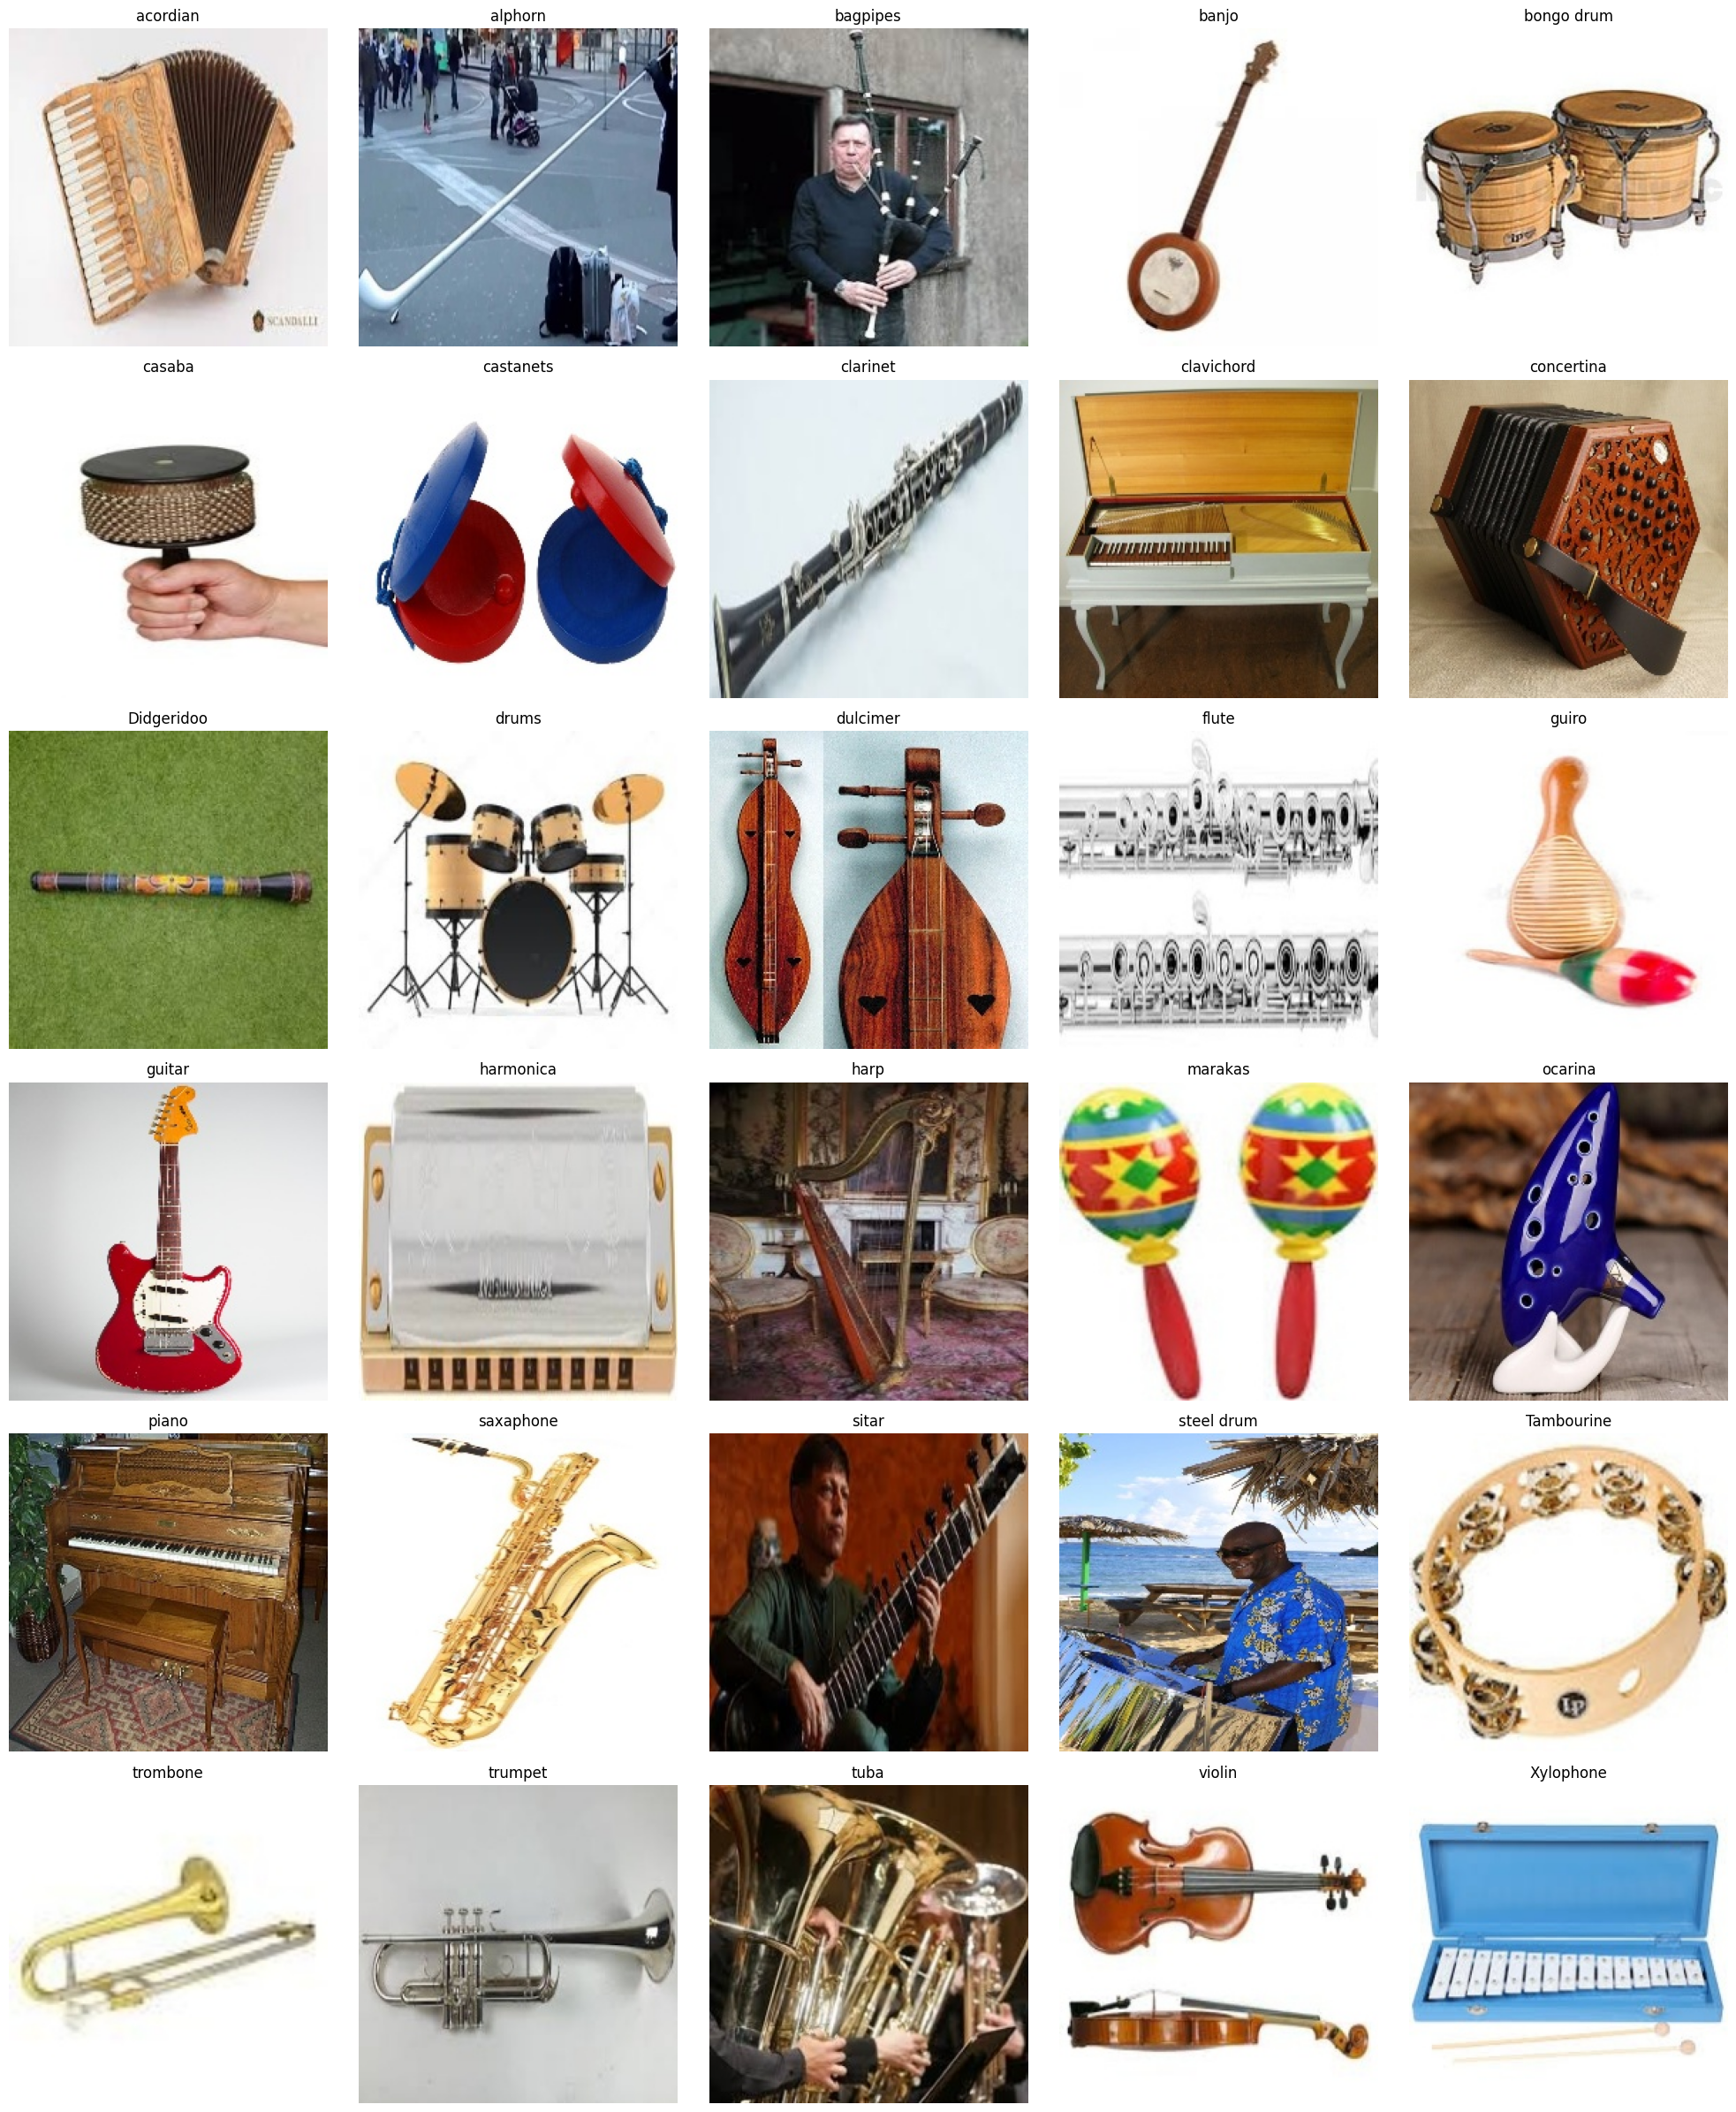

In [5]:
plot_sample_images(df, CLEAN_IMAGE_DIR)

## 6. Setup Image Preprocessing Pipeline
We use `ImageDataGenerator` to prepare data for ResNet50.
*   **Resize:** 224x224
*   **Preprocessing:** `resnet50.preprocess_input`
*   **No Augmentation:** As requested.

In [6]:
# Define constants
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Initialize Generator with ResNet50 preprocessing
datagen = get_image_generator()

print("ImageDataGenerator configured with ResNet50 preprocess_input.")

ImageDataGenerator configured with ResNet50 preprocess_input.
